In [1]:
using DIVAnd
using Compat: @info, range
using PyPlot
if VERSION >= v"0.7"
    using Statistics
end

┌ Info: Recompiling stale cache file /home/ctroupin/.julia/compiled/v1.0/DIVAnd/AaVxY.ji for DIVAnd [efc8151c-67de-5a8f-9a35-d8f54746ae9d]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/ctroupin/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


## Function to interpolate

In [3]:
fun(x,y) = sin.(6x) * cos.(6y)

# observations

x = rand(1);
y = rand(1);
f = fun.(x,y)

# final grid
xi,yi = ndgrid(range(0,stop=100,length=100),range(0,stop=110,length=110));

# reference field
fref = fun.(xi,yi);

### Simple plot

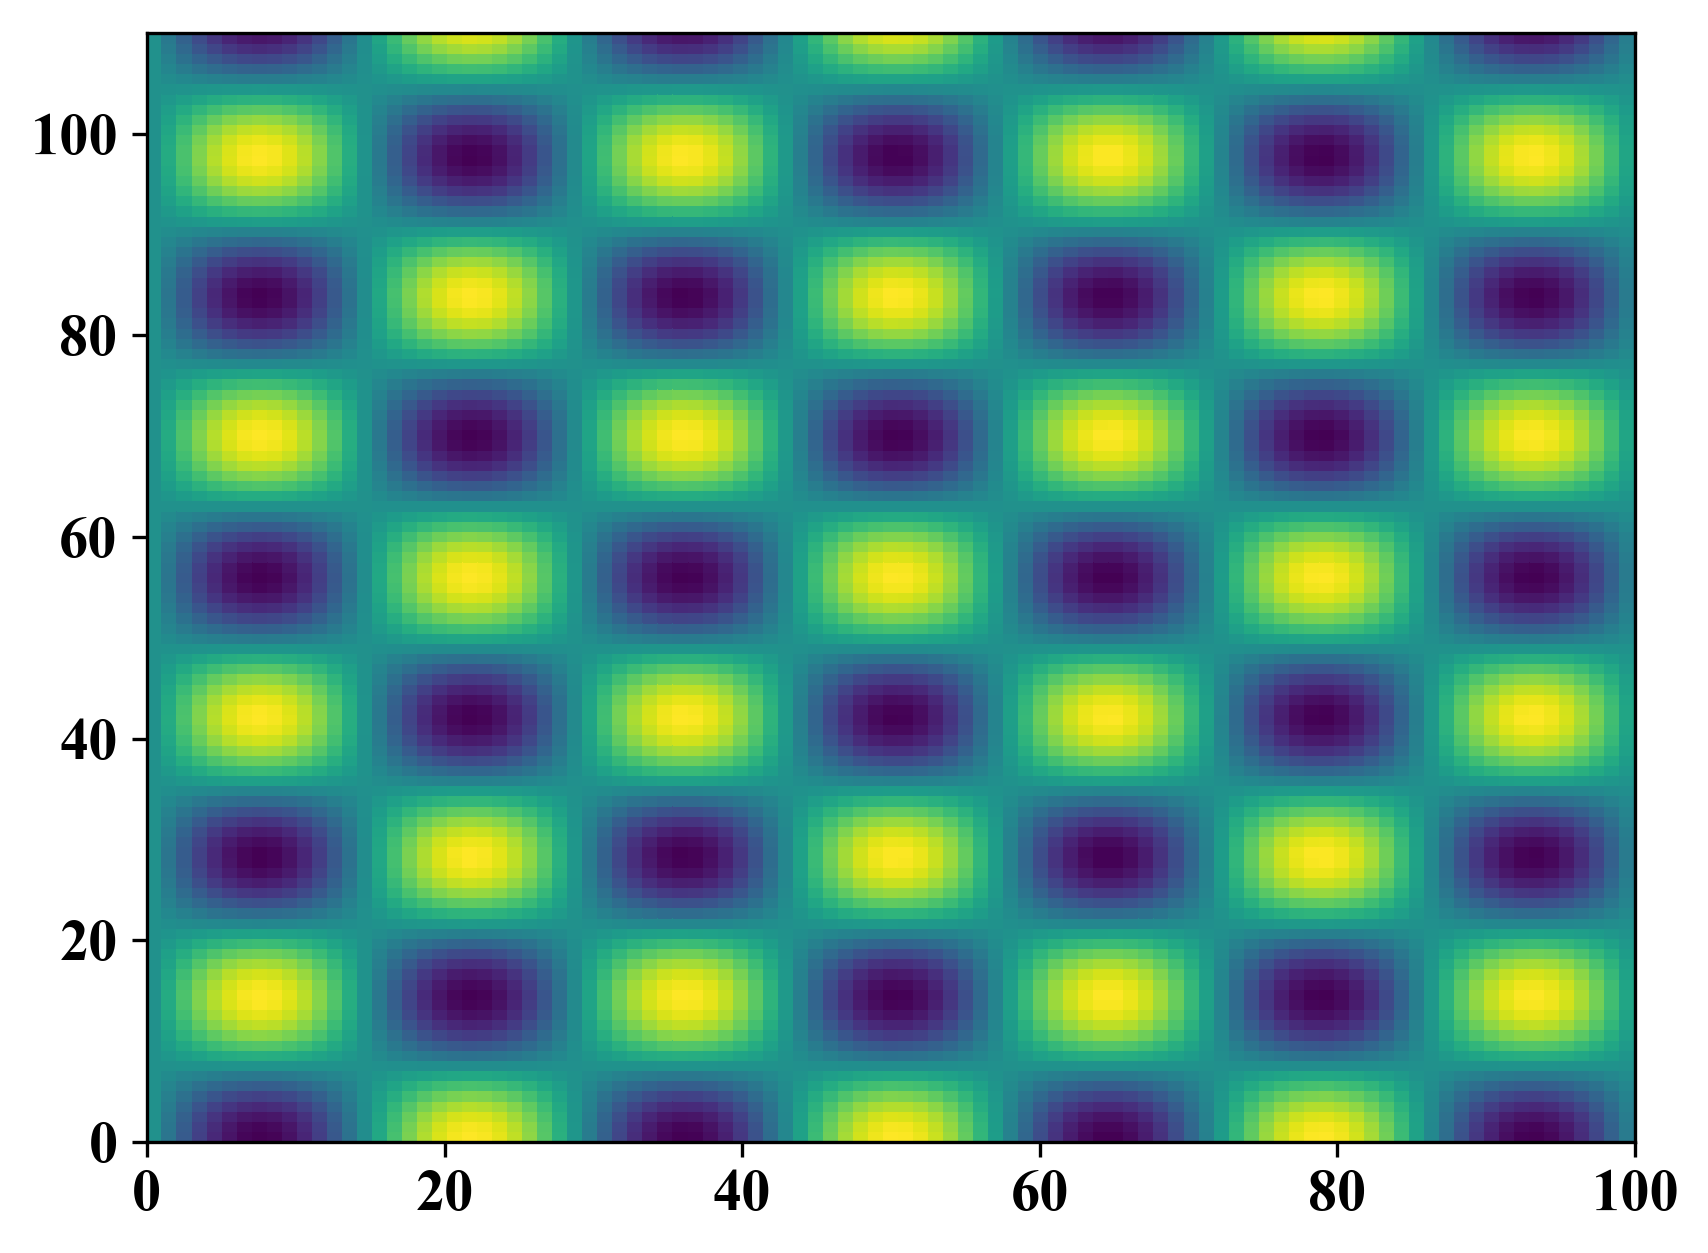

PyObject <matplotlib.collections.QuadMesh object at 0x7fbabf610160>

In [4]:
PyPlot.pcolormesh(xi, yi, fref)

## Create mask

In [7]:
mask = trues(size(xi));

# Add false along the edges
mask[1,:] .= false;
mask[end,:] .= false;
mask[:,1] .= false;
mask[:,end] .= false;

# island
mask[30:80,30:80] .= false;

### Simple plot
Note the *false* along the borders.

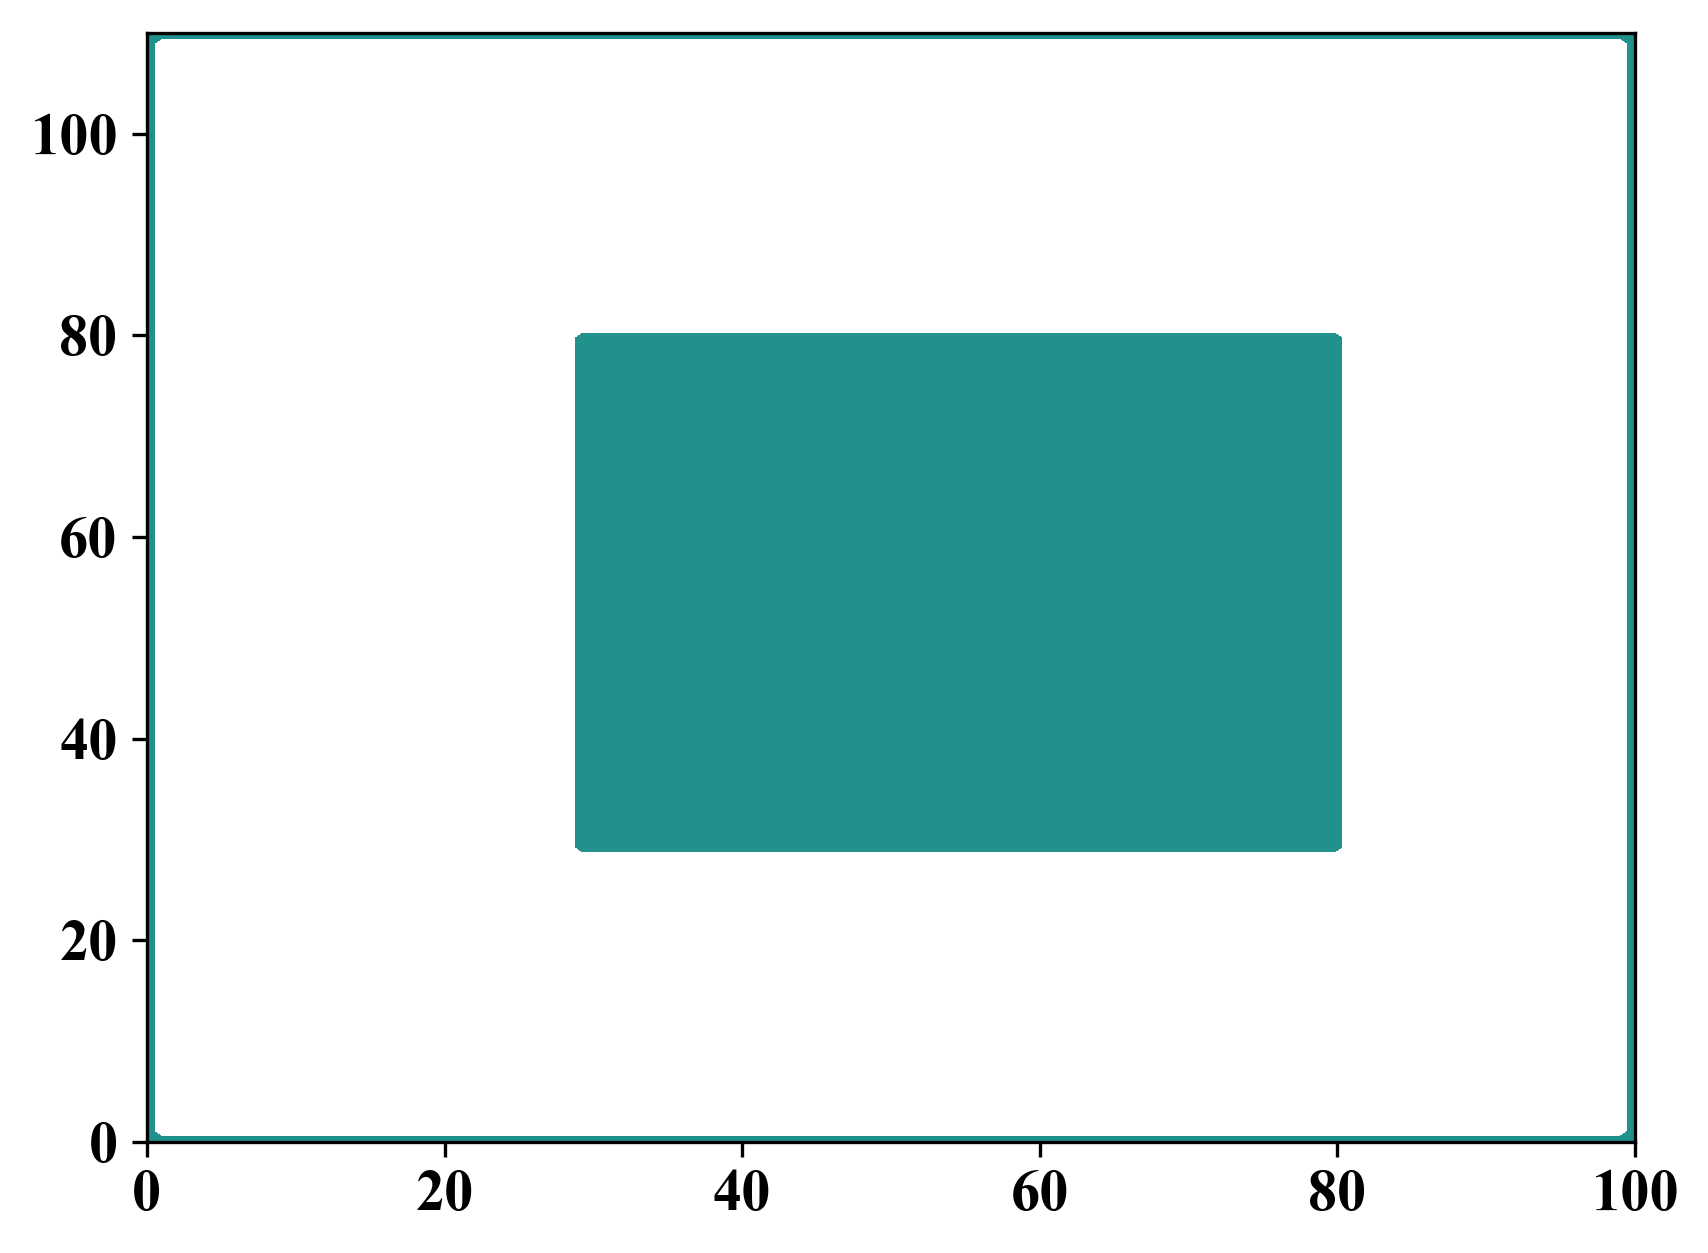

PyObject <matplotlib.contour.QuadContourSet object at 0x7fbaa374d828>

In [16]:
PyPlot.contourf(xi, yi, mask, [-.5, .5])

## Parameters

In [ ]:
# Metrics
pm = ones(size(xi)) / (xi[2,1]-xi[1,1]);
pn = ones(size(xi)) / (yi[1,2]-yi[1,1]);

# correlation length
len = 10;

# obs. error variance normalized by the background error variance
epsilon2 = 10000000.;

### Advection along isobaths
*h* is the artificial topography, it has the same size as the computation grid 

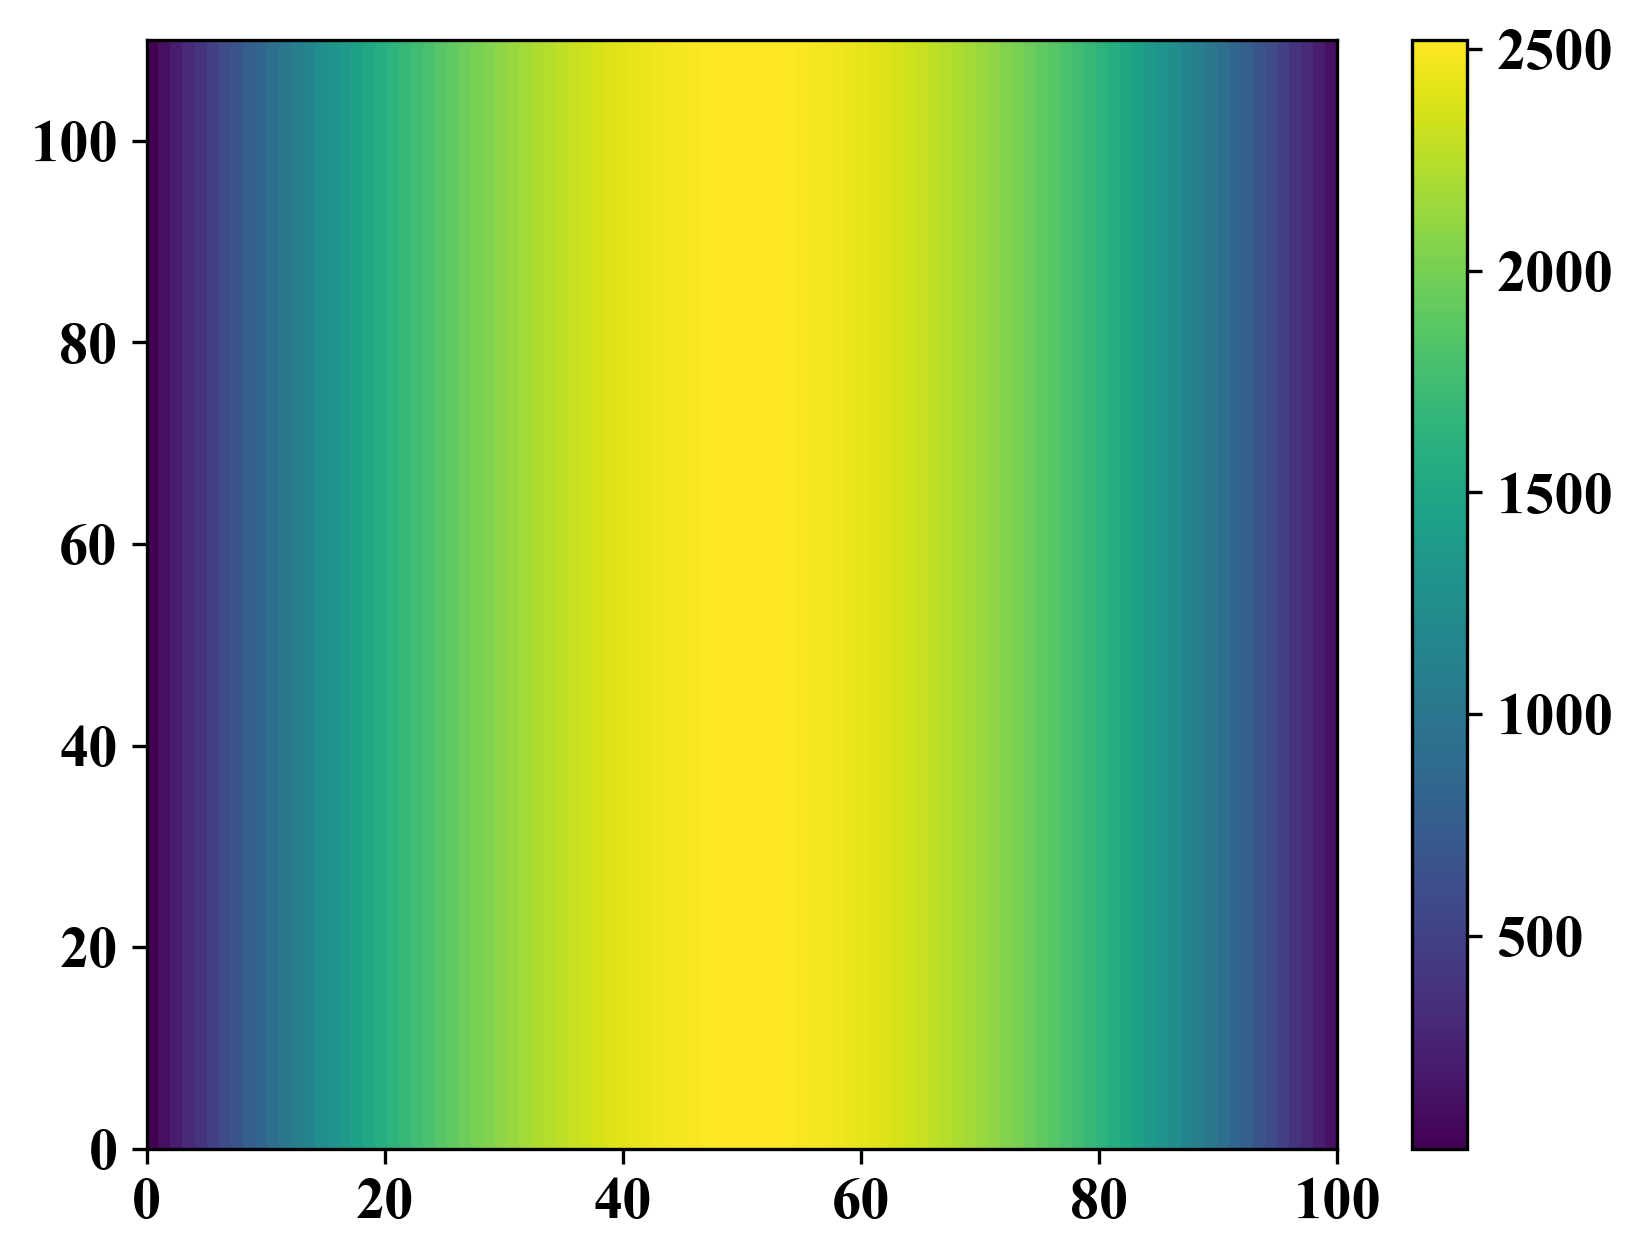

┌ Info: (100, 110)
└ @ Main In[24]:2


PyObject <matplotlib.colorbar.Colorbar object at 0x7fbaa3431780>

In [24]:
h = xi .* (100 .- xi) .+ 20;
@info(size(h))
PyPlot.pcolormesh(xi, yi, h)
PyPlot.colorbar()

### Advection through velocity field
We define the 2 components of the velocity field field.     
*rfluxes* specifies the error variance on the constraint.    

In [18]:
fluxes1 = sin.(yi[1,:]./10.)+0.1*rand(size(h)[2])
fluxes2 = sin.(xi[:,1]./10.)+0.1*rand(size(h)[1])
rfluxes = 1;

In [23]:
@info(size(fluxes1))
@info(size(fluxes2));

┌ Info: (110,)
└ @ Main In[23]:1
┌ Info: (100,)
└ @ Main In[23]:2


## Analysis
The first arguments of `DIVAndrun` are the same as a classical analysis.     
Then we add:
* *topographyforfluxes*: a tuple of 2 elements, one for each horizontal component, for the advection along isobath.
* *fluxes*: a tuple of 2 elements storing the pseuso-velocity field.
* *epsfluxes*: a scalar defining the error variance on the constraint. 

In [ ]:
@time fi,s = DIVAndrun(mask,(pm,pn),(xi,yi),(x,y),f,len,epsilon2;
    topographyforfluxes=(h,0),fluxes=(fluxes1,0),epsfluxes=rfluxes,alphabc=1,alpha=[1, 0, 1]);

In [ ]:
figure() 

pcolor(xi,yi,fi);
colorbar()

title("Interpolated field");

savefig("DIVAnd_simple_example_fluxes1.png")

fluxesafter=zeros(size(h)[2])

for j=1:size(h)[2]
 for i=2:size(h)[1]-2
	if mask[i,j]&& mask[i+1,j]
 		fluxesafter[j]=fluxesafter[j]+h[i,j]*(fi[i+1,j]-fi[i,j])
	end
 end
end
@show var(fluxes1+fluxesafter)
@show var(fluxes1)

@time fi,s = DIVAndrun(mask,(pm,pn),(xi,yi),(x,y),f,len,epsilon2;topographyforfluxes=(0,h),fluxes=(0,fluxes2),epsfluxes=rfluxes,alphabc=1,alpha=[1, 0, 1]);

# plotting of results


figure()

pcolor(xi,yi,fi);
colorbar()

title("Interpolated field");

savefig("DIVAnd_simple_example_fluxes2.png")

fluxesafter=zeros(size(h)[1])

for i=1:size(h)[1]
 for j=2:size(h)[2]-2
	if mask[i,j]&& mask[i,j+1]
 		fluxesafter[i]=fluxesafter[i]+h[i,j]*(fi[i,j+1]-fi[i,j])
	end
 end
end
 
@show var(fluxes2+fluxesafter)
@show var(fluxes2)


# finally both directions

@time fi,s = DIVAndrun(mask,(pm,pn),(xi,yi),(x,y),f,len,epsilon2;topographyforfluxes=(h,h),fluxes=(fluxes1,fluxes2),epsfluxes=rfluxes,alphabc=1,alpha=[1, 0, 1]);

# plotting of results

 
figure()
pcolor(xi,yi,fi);
colorbar()

title("Interpolated field");

savefig("DIVAnd_simple_example_fluxes12.png")




fluxesafter=zeros(size(h)[2])

for j=1:size(h)[2]
 for i=2:size(h)[1]-2
	if mask[i,j]&& mask[i+1,j]
 		fluxesafter[j]=fluxesafter[j]+h[i,j]*(fi[i+1,j]-fi[i,j])
	end
 end
end
@show var(fluxes1+fluxesafter)
@show var(fluxes1)

fluxesafter=zeros(size(h)[1])

for i=1:size(h)[1]
 for j=2:size(h)[2]-2
	if mask[i,j]&& mask[i,j+1]
 		fluxesafter[i]=fluxesafter[i]+h[i,j]*(fi[i,j+1]-fi[i,j])
	end
 end
end
 
@show var(fluxes2+fluxesafter)
@show var(fluxes2)